In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,10)

In [9]:
acclData = pd.read_csv("accelerometer_2018-03-02.csv")
acclData.head()

,_id,timestamp,device_id,x_axis,y_axis,z_axis,accuracy
0,1,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,0.090332,5.102539,8.535156,3
1,2,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,-0.201416,5.234375,8.482666,3
2,3,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,0.250244,5.150146,8.483887,3
3,4,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,-0.053711,5.262451,8.568115,3
4,5,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,-0.209961,5.092773,8.759766,3


In [10]:
acclData.isnull().values.any()

False

In [11]:
acclData.describe()

,_id,timestamp,x_axis,y_axis,z_axis,accuracy
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,5.242890e+05,1.519189e+12,-9.660480e-01,8.783123e-01,7.293558e+00,3.0
std,3.026977e+05,2.878174e+08,3.645775e+00,4.117424e+00,3.815582e+00,0.0
min,1.000000e+00,1.518890e+12,-3.995605e+01,-3.995117e+01,-3.947388e+01,3.0
25%,2.621455e+05,1.518930e+12,-1.024170e+00,-1.477051e-01,5.864258e+00,3.0
50%,5.242890e+05,1.518990e+12,-2.685547e-02,1.391602e-01,9.617920e+00,3.0
75%,7.864325e+05,1.519510e+12,3.625488e-01,2.220459e+00,9.807129e+00,3.0
max,1.048576e+06,1.519550e+12,3.775757e+01,3.999512e+01,3.995605e+01,3.0


In [12]:
acclData['timestamp'] = pd.to_datetime(acclData['timestamp'], unit='ms')

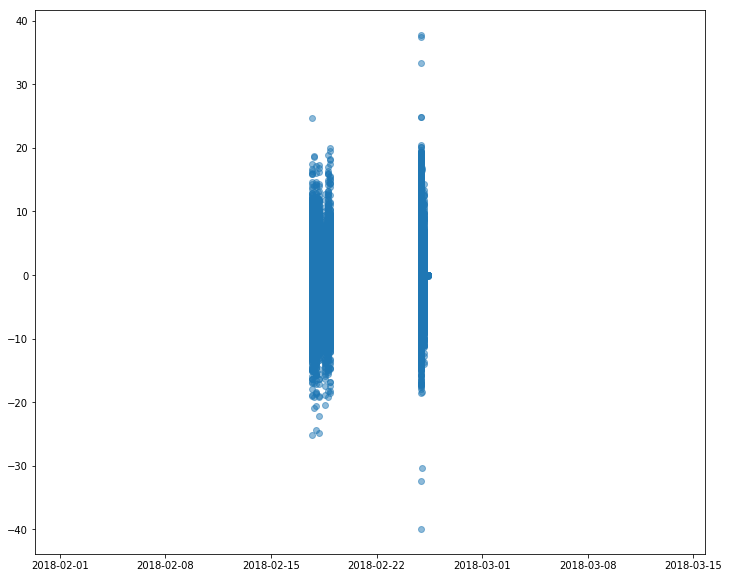

In [13]:
plt.scatter(acclData['timestamp'].values, acclData['x_axis'].values, alpha=0.5)

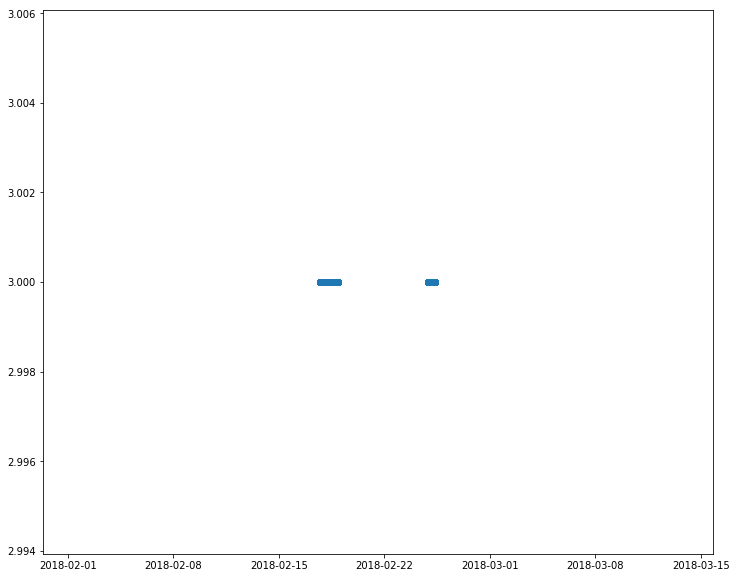

In [14]:
plt.scatter(acclData['timestamp'].values, acclData['accuracy'].values, alpha=0.5)

In [16]:
locData = pd.read_csv("locations_2018-03-02.csv")
locData.head()

,_id,timestamp,device_id,latitude,longitude,bearing,speed,altitude,provider,accuracy
0,1,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,41.949623,-87.669309,11.6,1.6,138,gps,18.204
1,2,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,41.949623,-87.669309,11.6,1.6,138,gps,18.204
2,3,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,41.949623,-87.669309,11.6,1.6,138,gps,18.204
3,4,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,41.949504,-87.669089,0.0,0.0,0,network,18.597
4,5,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,41.949599,-87.669277,0.0,0.0,137,gps,12.136


In [17]:
locData.isnull().values.any()

False

In [18]:
locData.describe()

,_id,timestamp,latitude,longitude,bearing,speed,altitude,accuracy
count,15285.000000,1.528500e+04,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000
mean,7643.000000,1.519601e+12,40.863446,-81.989456,16.394681,0.238370,153.529342,16.954596
std,4412.543767,4.080039e+08,0.653313,3.415929,60.519870,1.376691,144.477028,29.103172
min,1.000000,1.518890e+12,40.431568,-87.672214,0.000000,0.000000,0.000000,4.551000
25%,3822.000000,1.518990e+12,40.476904,-87.669061,0.000000,0.000000,0.000000,12.136000
50%,7643.000000,1.519780e+12,40.476942,-79.934934,0.000000,0.000000,154.000000,18.204000
75%,11464.000000,1.519900e+12,41.949468,-79.934901,0.000000,0.000000,310.000000,20.000000
max,15285.000000,1.520010e+12,41.949879,-79.892308,358.200012,15.130000,458.000000,1300.000000


In [19]:
locData['timestamp'] = pd.to_datetime(locData['timestamp'], unit='ms')

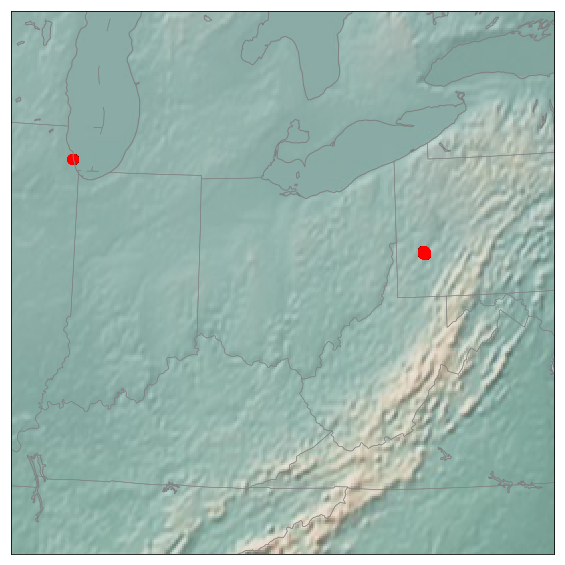

In [20]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='lcc', resolution='h', 
            lat_0=40, lon_0=-83,
            width=1e6, height=1e6)
m.drawstates(color='gray')
m.shadedrelief()
m.drawcoastlines(color='gray')
m.scatter(locData['longitude'].values, locData['latitude'].values, latlon=True, s=90, c='red')

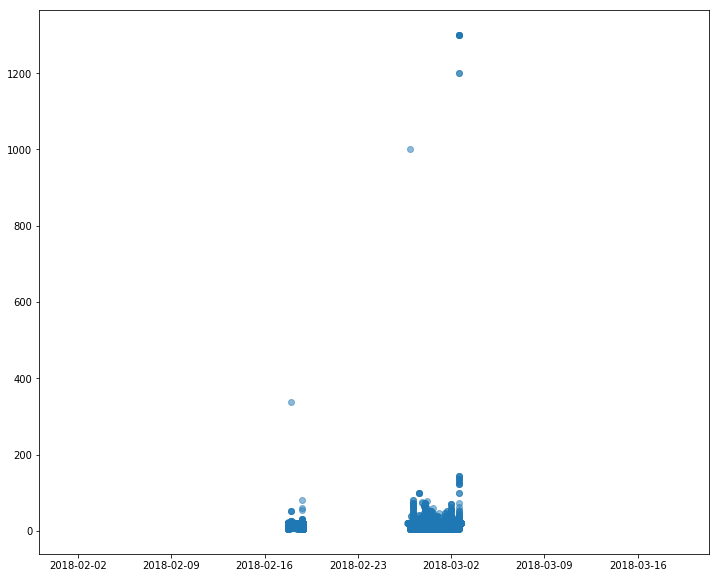

In [21]:
plt.scatter(locData['timestamp'].values, locData['accuracy'].values, alpha=0.5)

In [31]:
locData['day'] = locData['timestamp'].map(lambda t: t.day)

In [39]:
locData['morning'] = locData['timestamp'].map(lambda t: t.hour).between(5, 12)

In [40]:
locData['afternoon'] = locData['timestamp'].map(lambda t: t.hour).between(13, 19)

In [43]:
locData['night'] = ~locData['timestamp'].map(lambda t: t.hour).between(5, 19)

In [44]:
locData.head()

,_id,timestamp,device_id,latitude,longitude,bearing,speed,altitude,provider,accuracy,day,morning,afternoon,night
0,1,2018-02-17 17:53:20,49f45946-1986-4e45-9752-7c6906fce64f,41.949623,-87.669309,11.6,1.6,138,gps,18.204,17,False,True,False
1,2,2018-02-17 17:53:20,49f45946-1986-4e45-9752-7c6906fce64f,41.949623,-87.669309,11.6,1.6,138,gps,18.204,17,False,True,False
2,3,2018-02-17 17:53:20,49f45946-1986-4e45-9752-7c6906fce64f,41.949623,-87.669309,11.6,1.6,138,gps,18.204,17,False,True,False
3,4,2018-02-17 17:53:20,49f45946-1986-4e45-9752-7c6906fce64f,41.949504,-87.669089,0.0,0.0,0,network,18.597,17,False,True,False
4,5,2018-02-17 17:53:20,49f45946-1986-4e45-9752-7c6906fce64f,41.949599,-87.669277,0.0,0.0,137,gps,12.136,17,False,True,False


In [45]:
locData.to_csv("location.csv")

In [22]:
activData = pd.read_csv("activity_2018-03-02.csv")
activData.head()

,_id,timestamp,device_id,activity_name,activity_type,confidence,activities
0,1,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,still,3,100,"[{""activity"":""still"",""confidence"":100}]"
1,2,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,still,3,100,"[{""activity"":""still"",""confidence"":100}]"
2,3,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,still,3,100,"[{""activity"":""still"",""confidence"":100}]"
3,4,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,still,3,100,"[{""activity"":""still"",""confidence"":100}]"
4,5,1.518890e+12,49f45946-1986-4e45-9752-7c6906fce64f,still,3,100,"[{""activity"":""still"",""confidence"":100}]"


In [23]:
activData.isnull().values.any()

False

In [24]:
activData['timestamp'] = pd.to_datetime(activData['timestamp'], unit='ms')

In [25]:
activData.describe()

,_id,activity_type,confidence
count,2181.00000,2181.000000,2181.000000
mean,1091.00000,2.679505,81.162769
std,629.74479,1.233510,24.547998
min,1.00000,0.000000,21.000000
25%,546.00000,2.000000,61.000000
50%,1091.00000,3.000000,97.000000
75%,1636.00000,3.000000,100.000000
max,2181.00000,5.000000,100.000000


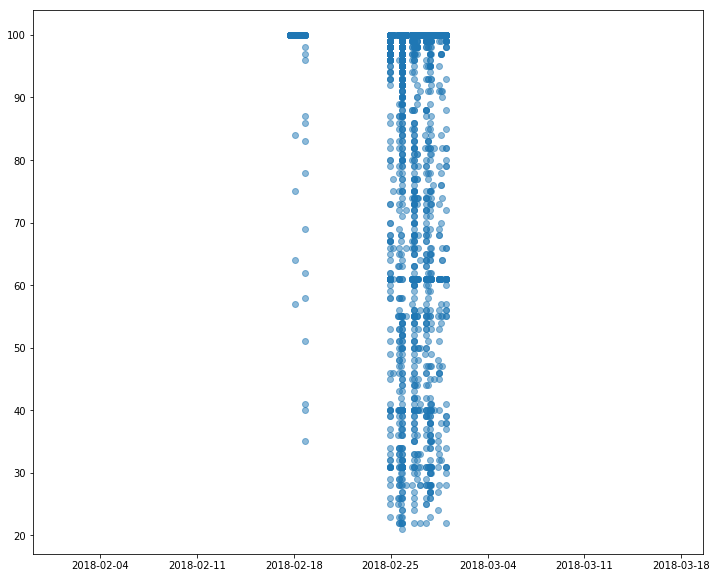

In [26]:
plt.scatter(activData['timestamp'].values, activData['confidence'].values, alpha=0.5)

(array([ 225.,    0.,  555.,    0.,    0., 1085.,    0.,  215.,    0.,
         101.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

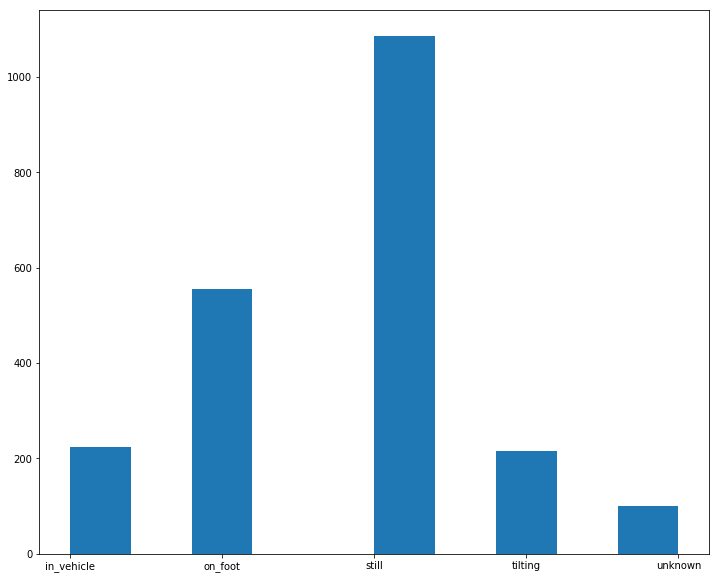

In [27]:
plt.hist(activData['activity_name'])

In [46]:
activData['day'] = activData['timestamp'].map(lambda t: t.day)

In [47]:
activData['morning'] = activData['timestamp'].map(lambda t: t.hour).between(5, 12)

In [48]:
activData['afternoon'] = activData['timestamp'].map(lambda t: t.hour).between(13, 19)

In [49]:
activData['night'] = ~activData['timestamp'].map(lambda t: t.hour).between(5, 19)

In [50]:
activData.head()

,_id,timestamp,device_id,activity_name,activity_type,confidence,activities,day,morning,afternoon,night
0,1,2018-02-17 17:53:20,49f45946-1986-4e45-9752-7c6906fce64f,still,3,100,"[{""activity"":""still"",""confidence"":100}]",17,False,True,False
1,2,2018-02-17 17:53:20,49f45946-1986-4e45-9752-7c6906fce64f,still,3,100,"[{""activity"":""still"",""confidence"":100}]",17,False,True,False
2,3,2018-02-17 17:53:20,49f45946-1986-4e45-9752-7c6906fce64f,still,3,100,"[{""activity"":""still"",""confidence"":100}]",17,False,True,False
3,4,2018-02-17 17:53:20,49f45946-1986-4e45-9752-7c6906fce64f,still,3,100,"[{""activity"":""still"",""confidence"":100}]",17,False,True,False
4,5,2018-02-17 17:53:20,49f45946-1986-4e45-9752-7c6906fce64f,still,3,100,"[{""activity"":""still"",""confidence"":100}]",17,False,True,False


In [51]:
activData.to_csv("activity.csv")